# Hyperparameter Tuning

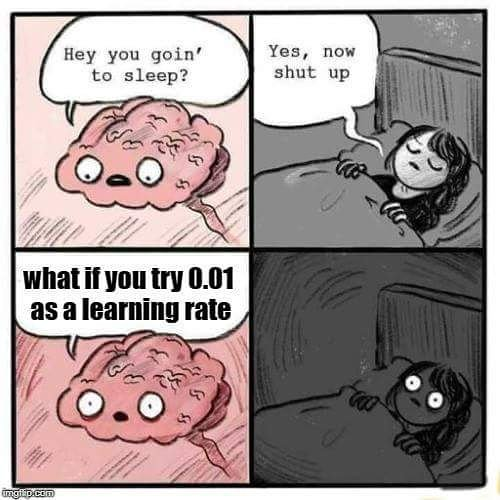

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
What is a hyperparameter? What is the difference between a hyperparameter and a parameter?<br>
</p></div>

## Model Parameters

<p style="line-height:1.75;font-size:16px">
A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data.

 * <span style="line-height:1.75;font-size:16px">
They are estimated or learned from data.
 * <span style="line-height:1.75;font-size:16px">
They are not set manually by the practitioner.

<p style="line-height:1.75;font-size:16px">
Often model parameters are estimated using an optimization algorithm, which is a type of efficient search through possible parameter values.

<p style="line-height:1.75;font-size:16px">
Some examples of model parameters include:
 * <span style="line-height:1.75;font-size:16px">
The weights in an artificial neural network.
 * <span style="line-height:1.75;font-size:16px">
The support vectors in a support vector machine.
 * <span style="line-height:1.75;font-size:16px">
The coefficients in a linear regression or logistic regression.

## Model Hyperparmeters

<p style="line-height:1.75;font-size:16px">
A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

 * <span style="line-height:1.75;font-size:16px">
They are often used in processes to help estimate model parameters.
 * <span style="line-height:1.75;font-size:16px">
They are often specified by the practitioner.
 * <span style="line-height:1.75;font-size:16px">
 They are often tuned for a given predictive modeling problem.

<p style="line-height:1.75;font-size:16px">
Model hyperparameters are often referred to as model parameters which can make things confusing. A good rule of thumb to overcome this confusion is as follows:
If you have to specify a model parameter manually then it is probably a model hyperparameter.

<p style="line-height:1.75;font-size:16px">
Some examples of model hyperparameters include:
 * <span style="line-height:1.75;font-size:16px">
The learning rate for training a neural network.
 * <span style="line-height:1.75;font-size:16px">
The maximum tree depth in a decision tree.
 * <span style="line-height:1.75;font-size:16px">
The k in k-nearest neighbors.

## Motivation

<p style="line-height:1.75;font-size:16px">
Consider this problem: You were given the task of classifying if a certain substance is sugar or salt given certain features such as size, shape and weight. You decide to use a random forest classifier so you train one and look at the results. You get the feeling that the model classifier could perform better so you start trying to train the model with different hyperparameters - number of estimators, maximum tree depth, minimum number of samples in leaf etc.

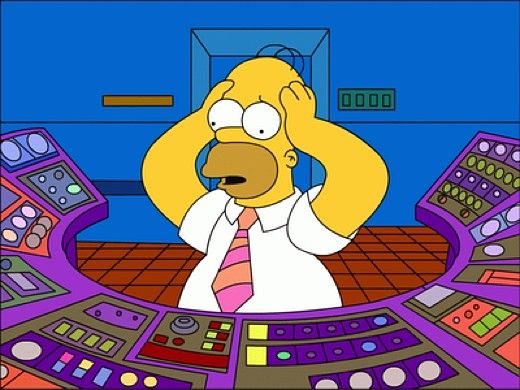

<p style="line-height:1.75;font-size:16px">
You can see how this would get tedious really quick. However, when we are building a model we usually want to get the best performance possible. This performance is greatly dependent on the hyperparameters we choose so there's no way around it. Luckily, there are certain methods and tools that help us do just that.

## Random Search

<p style="line-height:1.75;font-size:16px">
In the random search method, we define a search space of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this search space, records the performance, and returns the combination of hyperparameters which provided the best performance.

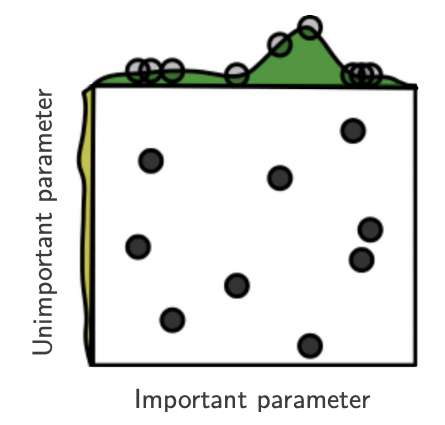

<p style="line-height:1.75;font-size:16px">
In sklearn's implementation of random search, it uses cross validation to find the best possible combination of parameters. Let's see how it works.

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
import numpy as np
from pprint import pprint 

# load iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X, y)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.27616377599617853,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.039204422272605496,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 148,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


<p style="line-height:1.75;font-size:16px">
Now that we have the hyperparameter values of the best performing model we can simply train a new model with these parameters. We could also use the return value of the random search directly since it returns the best model.

In [59]:
model.best_score_

0.9666666666666668

In [67]:
model.predict_proba([X[100]])

array([[0.00405405, 0.01315154, 0.9827944 ]])

## Grid Search

<p style="line-height:1.75;font-size:16px">
In the grid search method, we define a dictionary of possible values for hyperparameters. Each iteration tries a different combination of hyperparameters from this dictionary, records the performance, and returns the combination of hyperparameters which provided the best performance.

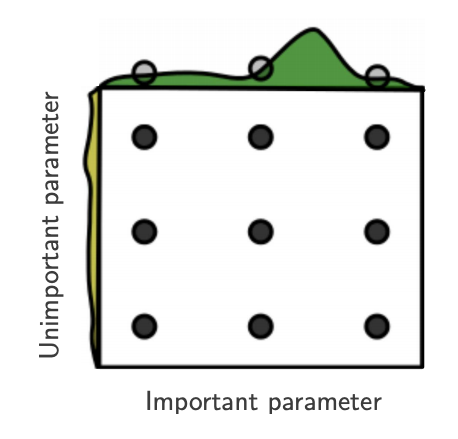

<p style="line-height:1.75;font-size:16px">
Sklearn's grid search also uses cross validation when determining the best set of hyperparameters.

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pprint import pprint 

# load iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

model_params = {
    'n_estimators': [4, 10, 50, 100, 204],
    'max_features': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 5, 10]
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X, y)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 204,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [72]:
model.best_score_

0.9666666666666668

In [73]:
model.predict_proba([X[100]])

array([[0.00163399, 0.01879085, 0.97957516]])

## Optuna

<p style="line-height:1.75;font-size:16px">
Optuna is a package that uses Bayesian hyperparameter optimization to find the best hyperparameter values. It has nice features such as defining how long we want the optimization to run and it also prunes low quality trials early. Let's see a working example.

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:14px"><b>Bayesian Hyperparameter Optimization</b></span><br>
Bayesian hyperparameter optimization is beyond the scope of this course but you can read a good explanation of what it does in <a href=https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f>this post</a>. 
</p></div>

In [9]:
!pip install optuna -U

Requirement already up-to-date: optuna in /Users/gadmarkovits/Anaconda/anaconda3/lib/python3.6/site-packages (2.7.0)
You should consider upgrading via the '/Users/gadmarkovits/Anaconda/anaconda3/bin/python -m pip install --upgrade pip' command.


<p style="line-height:1.75;font-size:16px">
We start with a simple random forest model to classify flowers in the Iris dataset. We define a function called `objective` that encapsulates the whole training process and outputs the accuracy of the model. The `trial` object has several methods for sampling hyperparameters. We then create a `study` to run the hyperparameter optimization and finally read the best hyperparameters.

In [1]:
import optuna
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    iris = load_iris()
    
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    return cross_val_score(clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print(f'Accuracy: {trial.value}')
print(f'Best hyperparameters: {trial.params}')

[I 2021-04-14 16:24:31,372] A new study created in memory with name: no-name-77f9e5d3-551b-46e0-822c-efd01b0663b8
[I 2021-04-14 16:24:32,532] Trial 0 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 8, 'max_depth': 25}. Best is trial 0 with value: 0.9533333333333333.
[I 2021-04-14 16:24:33,043] Trial 1 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 20, 'max_depth': 30}. Best is trial 0 with value: 0.9533333333333333.
[I 2021-04-14 16:24:33,086] Trial 2 finished with value: 0.96 and parameters: {'n_estimators': 8, 'max_depth': 31}. Best is trial 2 with value: 0.96.
[I 2021-04-14 16:24:33,118] Trial 3 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 9, 'max_depth': 13}. Best is trial 3 with value: 0.9666666666666667.
[I 2021-04-14 16:24:33,173] Trial 4 finished with value: 0.96 and parameters: {'n_estimators': 18, 'max_depth': 19}. Best is trial 3 with value: 0.9666666666666667.
[I 2021-04-14 16:24:33,216] Trial 5 

[I 2021-04-14 16:24:35,214] Trial 44 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 10, 'max_depth': 10}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:35,272] Trial 45 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 11, 'max_depth': 15}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:35,322] Trial 46 finished with value: 0.9733333333333333 and parameters: {'n_estimators': 11, 'max_depth': 16}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:35,373] Trial 47 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 13, 'max_depth': 32}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:35,421] Trial 48 finished with value: 0.94 and parameters: {'n_estimators': 11, 'max_depth': 21}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:35,468] Trial 49 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 12, 

[I 2021-04-14 16:24:37,749] Trial 88 finished with value: 0.96 and parameters: {'n_estimators': 8, 'max_depth': 21}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:37,809] Trial 89 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 7, 'max_depth': 14}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:37,900] Trial 90 finished with value: 0.96 and parameters: {'n_estimators': 11, 'max_depth': 16}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:37,992] Trial 91 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 6, 'max_depth': 15}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:38,051] Trial 92 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 7, 'max_depth': 13}. Best is trial 5 with value: 0.9733333333333333.
[I 2021-04-14 16:24:38,105] Trial 93 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 10, 'max_depth': 20}. 

Accuracy: 0.9733333333333333
Best hyperparameters: {'n_estimators': 13, 'max_depth': 19}


<p style="line-height:1.75;font-size:16px">
Another nice feature in Optuna is that since the entire process is encapsulated in the objective function we can add any Python code we'd like. For instance, we could condition on the <b>type</b> of model and thus check several models at the same time.

In [7]:
import optuna
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

def objective(trial):
    iris = load_iris()

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 20)
        max_depth = trial.suggest_int('max_depth', 1, 32)
        
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = SVC(C=c, gamma='auto')

    return cross_val_score(clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-04-14 16:27:48,079] A new study created in memory with name: no-name-916c6a3c-b929-4434-b574-77b4817b2861
[I 2021-04-14 16:27:48,108] Trial 0 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 954656066.6761277}. Best is trial 0 with value: 0.96.
[I 2021-04-14 16:27:48,232] Trial 1 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 20, 'max_depth': 32}. Best is trial 0 with value: 0.96.
[I 2021-04-14 16:27:48,290] Trial 2 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 10, 'max_depth': 25}. Best is trial 0 with value: 0.96.
[I 2021-04-14 16:27:48,322] Trial 3 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 5, 'max_depth': 27}. Best is trial 0 with value: 0.96.
[I 2021-04-14 16:27:48,339] Trial 4 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 44168.08925496276}. Best is tr

[I 2021-04-14 16:27:49,397] Trial 44 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 0.00046788941921687197}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:49,445] Trial 45 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 8, 'max_depth': 12}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:49,460] Trial 46 finished with value: 0.9733333333333333 and parameters: {'classifier': 'SVC', 'svc_c': 3.1715416985855738}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:49,477] Trial 47 finished with value: 0.9466666666666667 and parameters: {'classifier': 'SVC', 'svc_c': 428.3417719711633}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:49,500] Trial 48 finished with value: 0.9666666666666667 and parameters: {'classifier': 'SVC', 'svc_c': 1.4001587944736564}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:49,521] Trial 49 fi

[I 2021-04-14 16:27:50,402] Trial 85 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 94.52635222793322}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:50,426] Trial 86 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 0.17705925964095529}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:50,485] Trial 87 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 14, 'max_depth': 20}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:50,507] Trial 88 finished with value: 0.9733333333333333 and parameters: {'classifier': 'SVC', 'svc_c': 1.0205783541187825}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:50,528] Trial 89 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 0.002174586482469718}. Best is trial 42 with value: 0.9866666666666667.
[I 2021-04-14 16:27:50,546] Trial 90 finished with va

Accuracy: 0.9866666666666667
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 3.9930534025256623}


## Considerations

### Grid Search or Random Search

<p style="line-height:1.75;font-size:16px">
There's no clear cut answer to this question. When we have a relatively limited range of possible values for the hyperparameters or we know already have an idea of some good values then grid search will be quicker. If however, the search space is big and you don't have prior knowledge of what good hyperparameter values might be then you should go with random search which is more exploratory. Yoo could also combine the two methods by using grid search to get a rough estimate of good hyperparameter values and then use random search to fine tune the values.

### Which hyperparameters to tune

<p style="line-height:1.75;font-size:16px">
If you're using a model from sklearn then you can simply go to it's page and see what hyperparameters it uses. For instance, you can look <a heref=https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html>here</a> at the DecisionTreeClassifier. Getting to know which hyperparameters are most important boils down to experience - read papers, blog posts, talk to colleagues.

## Exercise

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Using the titanic dataset, train a classifier with the default hyperparameters. Then, try using the different hyperparameter optimization methods to find the best combination of hyperparameters for your model. Do you get the same results using the different techniques? Which was the best in terms of performance? Which was quickest?
</div>